# Zoo animal classification

In [49]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import decomposition
from sklearn.model_selection import train_test_split

#Viendo un poco la información que tenemos...
classes = pd.read_csv('class.csv')
print classes.head()
print classes.columns

#Viendo un poco más...
zoo = pd.read_csv('zoo.csv')
print zoo.head()
print zoo.columns

   Class_Number  Number_Of_Animal_Species_In_Class Class_Type  \
0             1                                 41     Mammal   
1             2                                 20       Bird   
2             3                                  5    Reptile   
3             4                                 13       Fish   
4             5                                  4  Amphibian   

                                        Animal_Names  
0  aardvark, antelope, bear, boar, buffalo, calf,...  
1  chicken, crow, dove, duck, flamingo, gull, haw...  
2    pitviper, seasnake, slowworm, tortoise, tuatara  
3  bass, carp, catfish, chub, dogfish, haddock, h...  
4                             frog, frog, newt, toad  
Index([u'Class_Number', u'Number_Of_Animal_Species_In_Class', u'Class_Type',
       u'Animal_Names'],
      dtype='object')
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    an

In [50]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 13.8+ KB


## Utilizando PCA para reducir dimensiones
 seaborn para heatmap.-
 ¿muchas dimensiones?
 se calcula la covarianza (correlación)

In [51]:
#elimino la columna de tipo de clase
zoo1 = zoo.drop(columns=['class_type'])
matriz = zoo1.corr()
print matriz

              hair  feathers      eggs      milk  airborne   aquatic  \
hair      1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554   
feathers -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552   
eggs     -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244   
milk      0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613   
airborne -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638   
aquatic  -0.473554 -0.058552  0.376244 -0.362613 -0.172638  1.000000   
predator -0.154769 -0.104430  0.011605 -0.029721 -0.295181  0.375978   
toothed   0.492531 -0.613631 -0.642150  0.628168 -0.594311  0.053150   
backbone  0.191681  0.231403 -0.340420  0.384958 -0.104718  0.022463   
breathes  0.441149  0.254588 -0.382777  0.423527  0.286039 -0.637506   
venomous -0.104245 -0.145739  0.098689 -0.242449  0.008528  0.087915   
fins     -0.280313 -0.223541  0.164796 -0.156328 -0.251157  0.604492   
legs      0.394009 -0.206686 -0.224918  0.214196  0.043712 -0.36

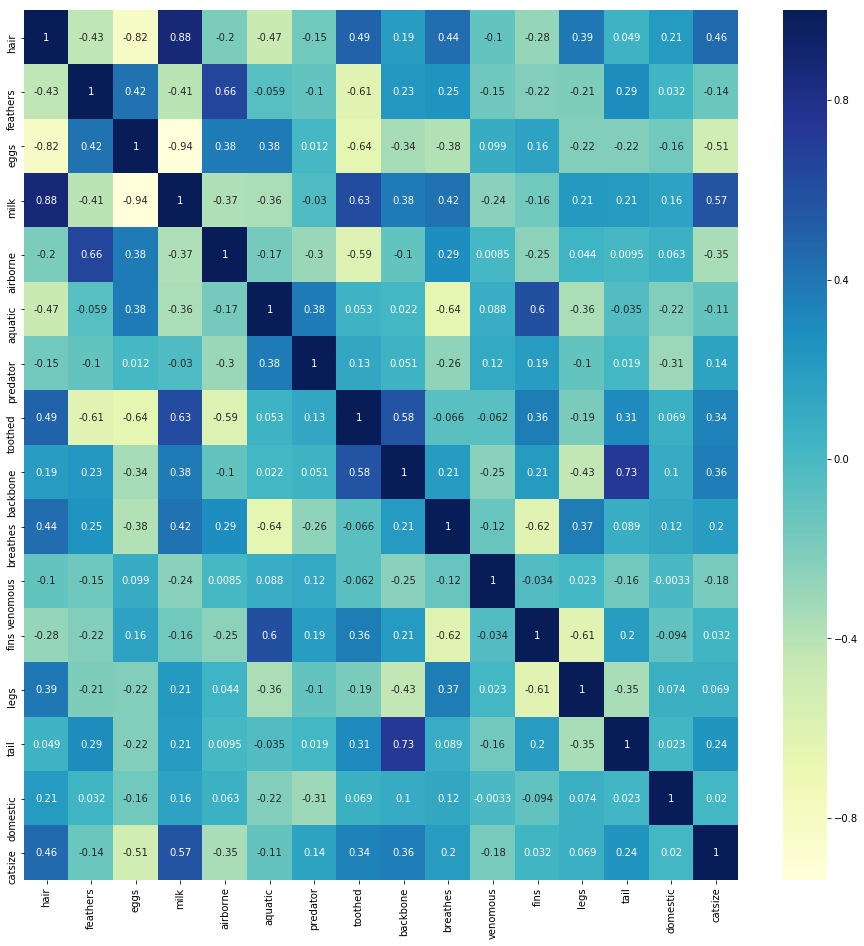

In [52]:
f, ax = plt.subplots(figsize=(16, 16))

#annot -> valores en la matriz
#Vemos que los que tienen pelo es más probable que tome leche a que ponga huevos. ¿y el ornitorrinco?
sns.heatmap(matriz, annot=True, cmap="YlGnBu")

In [53]:
#Armo data + target para reducir dimensiones por PCA
_X = zoo.iloc[:,1:17].values   

#valor destino
_y = zoo.iloc[:,17].values

X_train, X_test, y_train, expected = train_test_split(_X, _y, test_size=0.3, random_state=0)


In [54]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)
pca = decomposition.PCA(n_components=3)
pca.fit(_X)
X = pca.transform(_X)

## Utilizando KNN para la predicción

In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        11
          2       1.00      1.00      1.00         6
          3       0.00      0.00      0.00         2
          4       0.78      1.00      0.88         7
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2

avg / total       0.89      0.94      0.91        31

[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [56]:
print predicted

[5 4 4 1 1 1 2 4 1 1 7 1 2 7 4 6 1 6 2 4 2 4 1 2 1 1 1 2 4 4 4]


In [57]:
print expected

[5 4 4 1 1 1 2 4 1 1 7 1 2 7 4 6 1 6 2 4 2 3 1 2 1 1 1 2 4 3 4]


# Análisis

Fueron muy exactos las clasificaciones de clases 1,2,5,6 y 7. 
No hubo datos para la clase 3 y la clase 4 tuvo algunos errores en la predicción.